In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [4]:
loan=pd.read_csv("train_loan (1).xls")

In [5]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan["Gender"].fillna(loan["Gender"].mode()[0],inplace=True)

In [8]:
loan["Married"].fillna(loan["Married"].mode()[0],inplace=True)

In [9]:
loan["Dependents"].fillna(loan["Dependents"].mode()[0],inplace=True)
loan["Self_Employed"].fillna(loan["Self_Employed"].mode()[0],inplace=True)
loan["LoanAmount"].fillna(loan["LoanAmount"].mode()[0],inplace=True)
loan["Loan_Amount_Term"].fillna(loan["Loan_Amount_Term"].mode()[0],inplace=True)
loan["Credit_History"].fillna(loan["Credit_History"].mode()[0],inplace=True)

In [10]:
loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


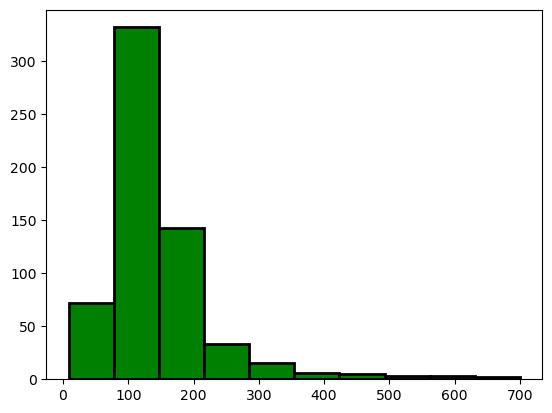

In [41]:
plt.hist(loan["LoanAmount"],color="green",edgecolor="k",linewidth=2)
plt.show()

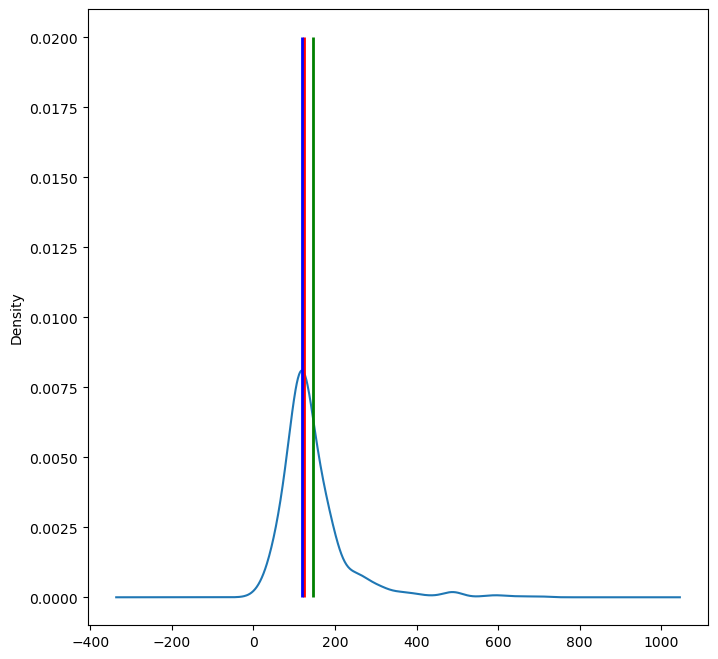

In [45]:
normal_data=loan["LoanAmount"]
normal_data.plot(kind="density",figsize=(8,8))
plt.vlines(normal_data.mean(),ymin=0,ymax=0.02,linewidth=2,color="green")
plt.vlines(normal_data.median(),ymin=0,ymax=0.02,linewidth=2,color="red")
plt.vlines(normal_data.mode(),ymin=0,ymax=0.02,linewidth=2,color="blue")

# CONDITIONAL PROBABILITY

a measure of calculating a probability of an event (A) to occur given that another event (B) has already occured
Formula: P(A|B) = P(A$B)/P(B)

P(A|B) = probability of A occuring, given B occured

P(A$B) = Probability of both A and B occuring

P(B) = probability of B occuring````````````

- what is the probability of getting approval for loan if the applicant is a graduate

In [13]:
pd.crosstab(loan["Education"],loan["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


P(A)=LOAN HAS BEEN APPROVED

P(B)=APPLICANT IS GRADUATE

P(A|B)=GETTING LOAN APPROVAL GIVEN THAT THE APPLICANT IS GRADUATE

In [14]:
422/614

0.6872964169381107

P(A)=422/614=0.6872964169381107


In [20]:
480/614

0.7817589576547231

P(B)=480/614=0.7817589576547231

In [21]:
340/614

0.5537459283387622

P(AnB)=340/614=0.5537459283387622

In [23]:
0.5537459283387622/0.7817589576547231

0.7083333333333334

P(A|B)=P(AnB)/P(B)

- 70% applicant who is graduate have the chances for getting approval for loan

In [25]:
loan


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


P(A|B)=PROBABILITY OF GETTING LOAN GIVEN THE CREDIT IS SCORE IS GOOD

P(A)=PROBABILITY OF GETTING LOAN

P(B)=PROBABILTY OF CREDIT SCORE =1

P(AnB)=PROBABILITY OF GETTING LOAN AND CREDIT SCORE BEING 1

In [27]:
pd.crosstab(loan["Loan_Status"],loan["Credit_History"],margins=True)

Credit_History,0.0,1.0,All
Loan_Status,,,
N,82,110,192
Y,7,415,422
All,89,525,614


In [31]:
422/614
#P(A)=415/614=0.6758957654723127

0.6872964169381107

In [33]:
525/614
#P(B)=525/614=0.8550488599348535

0.8550488599348535

In [36]:
415/614
#P(AnB)=415/614=0.6758957654723127

0.6758957654723127

In [38]:
0.6758957654723127/0.8550488599348535
#P(A|B)=0.6758957654723127/0.8550488599348535=0.7904761904761904

0.7904761904761904

- PROBABILITY OF GETTING LOAN IF THE CREDIT SCORE IS GOOD WILL BE 79%